In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Black-Scholes Equation (BSE)

In [2]:
def Euler_Maruyama_BSE(dt, T, y0, mu, sigma):
    traj = []
    for i in range(T):
        z = np.random.normal(0,1)
        y_new = y0 + mu*y0*dt + sigma*y0*z*np.sqrt(dt)
        traj.append(y_new)
        y0 = y_new
    return np.array(traj)

In [3]:
def Milstein_BSE(dt, T, y0, mu, sigma):
    traj = []
    for i in range(T):
        z = np.random.normal(0,1)
        y_new = y0 + mu*y0*dt + sigma*y0*z*np.sqrt(dt) + 0.5*sigma*((z*np.sqrt(dt))**2 - dt)
        traj.append(y_new)
        y0 = y_new
    return np.array(traj)

In [4]:
def analytical(x0, t, w, mu, sigma):
     
    return x0*np.exp((mu-(0.5*sigma**2))*t + sigma*w)

In [15]:
ana = analytical(307, np.linspace(0,1,10000),np.random.normal(0,.01,10000),0.75, 0.3)
#stock_milstein = Milstein_BSE(0.01, 10000, 307, 0.75, 0.3)
stock_euler = Euler_Maruyama_BSE(0.0001, 10000, 307, 0.75, 0.3)

In [16]:
def err_function(T):
    time_length = [10**i for i in range(T)]
    time_step = [10**-j for j in range(T)]
    errors = []
    count = 0
    for m,n in list(zip(time_step, time_length)):
        
        stock_milstein = Milstein_BSE(m, n, 307, 0.75, 0.3)
        stock_ana = analytical(307, np.linspace(0,1,n),np.random.normal(0,m,n),0.75, 0.3)
        errors.append((np.sqrt((stock_ana- stock_milstein)**2)).mean())
        print(count)
        count +=1
    return np.array(errors)

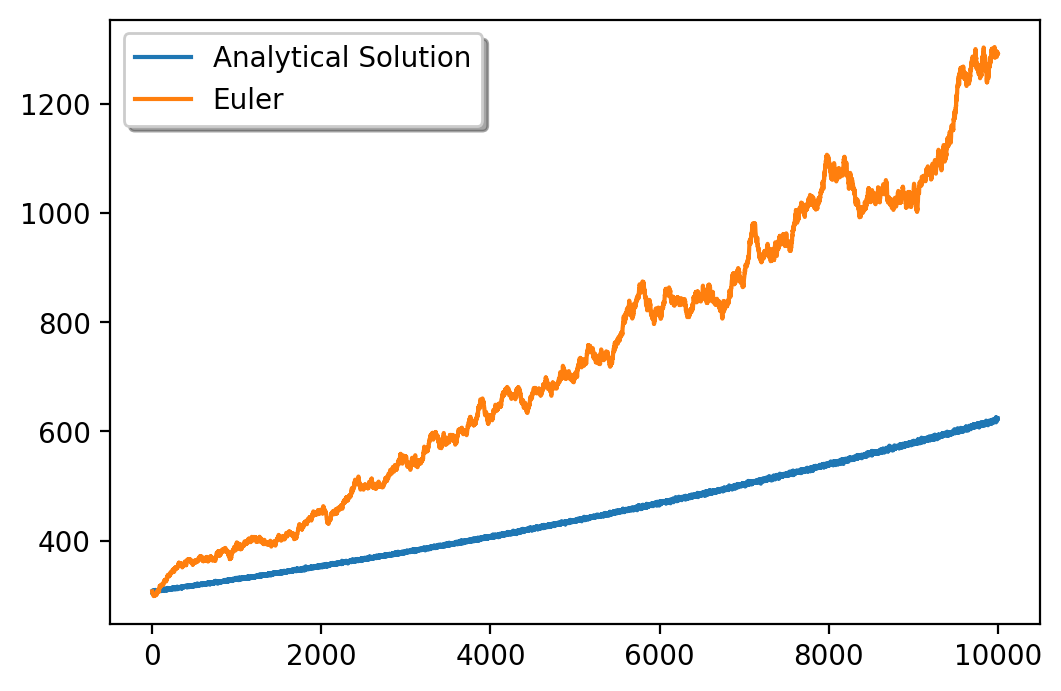

In [30]:
figure(num=2, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
plt.plot(ana, label = 'Analytical Solution')
plt.plot(stock_euler, label = 'Euler')
#plt.plot(stock_milstein, label = 'Milstein')
plt.legend(shadow = True)
plt.show()

#### Langevin Equation (LE)

In [27]:
def Euler_Maruyama_LE(dt, T, y0, mu, sigma):
    traj = np.zeros(T)
    for i in range(T):
        z = np.random.normal(0,1)
        y_new = y0 - mu*y0*dt + sigma*z*np.sqrt(dt)
        traj[i] = y_new
        y0 = y_new
        
    return traj

In [28]:
Langevin = Euler_Maruyama_LE(0.01, 10000, 10, 10, 1)

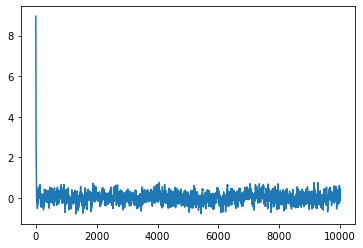

In [29]:
plt.plot(Langevin)